<a href="https://colab.research.google.com/github/idanovadia/wikipedia_crawler/blob/master/wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Q1**


In [0]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import re

In [0]:
url_q1 = "https://en.wikipedia.org/wiki/Julia_Roberts_filmography"
html_q1 = urlopen(url_q1)
bs_obj_q1 = BeautifulSoup(html_q1.read()) #parsing the html tags
table = (bs_obj_q1.find_all('table'))[0] #keeping only the first table which is the one needed

In [0]:
import pandas as pd

In [0]:
df_table = pd.read_html(str(table)) #returns list of dataFrames. we need a dataframe type and not a list
df_table = pd.concat(df_table) #returns a dataFrame type
final_table = df_table.iloc[:,0:4] #picking relevant columns to display

**show the DF**


In [5]:
final_table

,Title,Year,Role,Director(s)
0,Firehouse,1987,Babs,J. Christian Ingvordsen
1,Satisfaction,1988,Daryle Shane,Joan Freeman
2,Mystic Pizza,1988,Daisy Arujo,Donald Petrie
3,Blood Red,1989,Marisa Collogero,Peter Masterson
4,Steel Magnolias,1989,Shelby Eatenton Latcherie,Herbert Ross
5,Pretty Woman,1990,Vivian Ward,Garry Marshall
6,Flatliners,1990,Rachel Mannus,Joel Schumacher
7,Sleeping with the Enemy,1991,Laura Williams Burney/ Sara Waters,Joseph Ruben
8,Dying Young,1991,Hilary O'Neil,Joel Schumacher
9,Hook,1991,Tinker Bell,Steven Spielberg


##  **Q2**


Present a readable table with the following fields per co-actor\actress: name, year of birth, country of birth and number of awards that he\she got.

an actor object definition

In [0]:
class Actor:
  def __init__(self,title,link):
    self.link = link
    self.title = title
    self.count = 1
    self.yearOfBirth ="NA" #for Not Available
    self.countryOfBirth ="NA" #for Not Available
    self.numberOfAwards = "0"

  def __setYearOfBirth__(self,year):
    self.yearOfBirth = year

  def __setCountryOfBirth__(self,country):
    self.countryOfBirth = country

  def __setNumberOfAwards__(self,awards):
    self.numberOfAwards = awards

  def __setCount__(self):
    self.count = self.count + 1

  def __repr__(self):
    return  self.title +"    " +self.link + "   " +str(self.count) + "    " +self.yearOfBirth + "   " + self.countryOfBirth +"    "+ self.numberOfAwards

  def __str__(self):
    return  self.title +"    " +self.link + "   " +str(self.count) + "    " +self.yearOfBirth + "   " + self.countryOfBirth +"    "+ self.numberOfAwards

  def to_dict_q2(self) -> dict:
        return {
            "Name": self.title,
            "Year of Birth": self.yearOfBirth,
            "Country of Birth": self.countryOfBirth,
            "Awards": self.numberOfAwards,
        }
  
  def to_dict_q3(self) -> dict:
        return {
            "Name": self.title,
            "Number of performance": self.count,
        }

In [0]:
base_url = "https://en.wikipedia.org"
list_of_actors = {}


Getting from the table of the movies that Julia Roberts had participate links to them
    ![alt text](https://drive.google.com/uc?id=1ZePzlLAZ1oCH_hLxBHOzY8gZixJbtY2L)
    


In [0]:
th_list = BeautifulSoup(str(table))
th_list = th_list.find_all('th')
th_list = BeautifulSoup(str(th_list))
a_actors_list = th_list.find_all('a')
links_of_movies = re.findall(r'href="(.*?)" ', str(a_actors_list))
links_of_movies = [base_url+x for x in links_of_movies] #create proper links

In [0]:
#getting list of actors 
def get_list_of_actors_in_cast(index_h2,list_of_actors):
  ul_of_actors = index_h2.findNext('ul') 
  if len(ul_of_actors)>6: # small ul is not a cast 
    ul_of_actors = BeautifulSoup(str(ul_of_actors))
  actors_names = re.findall(r'title="(.*?)">', str(ul_of_actors))
  actors_urls = re.findall(r'href="(.*?)" ', str(ul_of_actors))
  actors_urls = [base_url+x for x in actors_urls] # create list of links of actors
  for index, (actors_name,actors_url) in enumerate(zip(actors_names,actors_urls)):
    # create actor if not in the dict otherwise increase it by 1
    if actors_name in list_of_actors:
      list_of_actors[actors_name].__setCount__()
    else:
      list_of_actors[actors_name] = (Actor(link=actors_url,title=actors_name))

Crwal each movie and find all the actors that play

![alt text](https://drive.google.com/uc?id=1NbVK7jR2iUuC3WQMxfRoOVfMBMz5W59c)

In [0]:
for movie in links_of_movies:  #run on all the movies
    movie_resource = urlopen(movie)
    obj_q2 = BeautifulSoup(movie_resource)
    list_of_h2 = obj_q2.findAll('h2')
    for index_h2 in list_of_h2: # run on all to find the cast table
      id_of_h2 = re.findall(r'id="(.*?)">', str(index_h2))
      if len(id_of_h2)>0 and ('cast' in id_of_h2[0].lower()): #check if it a cast table
        get_list_of_actors_in_cast(index_h2,list_of_actors)
        break

In [0]:
# del Julia Roberts from the list
if "Julia Roberts" in list_of_actors:
  del list_of_actors["Julia Roberts"]

In [0]:
#print(len(list_of_actors))
#for x in sorted(list_of_actors):
#  print(x)

1. getting the span that hold the birth
2. getting the div that hold the birth place

![alt text](https://drive.google.com/uc?id=1X1BYYGpPthaTeF4xTZ0RhjRYsCvZT887)

In [0]:
def getYear(bs_obj_q2):
  year = bs_obj_q2.find_all('span',{"class": "bday"})
  if len(year) > 0:
    year = str(year[0].text).split('-')[0]
    return year
  else:
    return "NA"

In [0]:
def getCountry(bs_obj_q2):
  country =  bs_obj_q2.find_all('div',{"class": "birthplace"})
  if len(country) > 0 :
    country = str(country[0].text)
    return country
  else:
    return "NA"


1. get all the tables in the page of the actor
2. count the times that the word "Won" exist in the tables

![alt text](https://drive.google.com/uc?id=1hTjotXLGjhyA1V083OA_StFYGbd2JOTg)



In [0]:
def getAwards(bs_obj_q2):
  count = 0
  awards =  bs_obj_q2.find_all('table') 
  for award in awards:
    if "Won" in str(award) or "Nominated" in str(award): #todo maybe easier in regex
      award_BS = BeautifulSoup(str(award))
      count = count + str(award).count("Won")
  if count==0: #todo maybe its a link for awards so check there
    1+1
  return str(count)

Getting info about each actor and update the Actor list 

In [16]:
list_of_not_actors=[]
try:
  for actor_name, actor_obj in list_of_actors.items():
    try:
      link = actor_obj.link
      html_actor = urlopen(link)
      bs_obj_q2 = BeautifulSoup(html_actor.read()) #todo check in page if actor (try this and delete if bad)
      if "actor" in str(bs_obj_q2) or "actress" in str(bs_obj_q2):    
        # add year to actor 
        list_of_actors[actor_name].__setYearOfBirth__(getYear(bs_obj_q2))
        # add country to actor  
        list_of_actors[actor_name].__setCountryOfBirth__(getCountry(bs_obj_q2))
        list_of_actors[actor_name].__setNumberOfAwards__(getAwards(bs_obj_q2))
      else:
      list_of_not_actors.append(actor_name)
    except Exception as e:
      print("an actor could not been indexed correctly due to",e)
  for not_actor in list_of_not_actors:
    list_of_actors.pop(not_actor)
except:
  

an actor could not been indexed correctly due to <urlopen error [Errno -2] Name or service not known>
an actor could not been indexed correctly due to <urlopen error [Errno -2] Name or service not known>
an actor could not been indexed correctly due to HTTP Error 404: Not Found
an actor could not been indexed correctly due to HTTP Error 404: Not Found
an actor could not been indexed correctly due to HTTP Error 404: Not Found


Create DF of Actors

In [17]:
author_dicts = [actor_obj.to_dict_q2() for actor_name, actor_obj in list_of_actors.items()] #Creating a Dict to save all the actors
df_q2 = pd.DataFrame(author_dicts) #returns a dataframe type
df_q2

,Name,Year of Birth,Country of Birth,Awards
0,IMDb,NA,NA,0
1,Rotten Tomatoes,1990,NA,0
2,AllMovie,NA,NA,0
3,Justine Bateman,1966,"Rye, New York, U.S.",0
4,Liam Neeson,1952,"Ballymena, County Antrim, Northern Ireland",0
...,...,...,...,...
642,Alexandra Park (actress),1989,"Sydney, Australia[1]",3
643,Michael Esper,1976,"Manhattan, New York, United States",0
644,Tim Guinee,1962,"Los Angeles, California, U.S.",3
645,Henry Stram,1954,"Lafayette, Indiana, U.S.",0


# **Q3**


In [23]:
author_dicts_count = [actor_obj.to_dict_q3() for actor_name, actor_obj in list_of_actors.items()]
df_q3 = pd.DataFrame(author_dicts_count)
df_q3

,Name,Number of performance
0,IMDb,1
1,Rotten Tomatoes,1
2,AllMovie,1
3,Justine Bateman,1
4,Liam Neeson,2
...,...,...
642,Alexandra Park (actress),1
643,Michael Esper,1
644,Tim Guinee,1
645,Henry Stram,1


In [0]:
dict_histogram = {}
for item in author_dicts_count:
  performance = item["Number of performance"]
  if performance in dict_histogram:
    dict_histogram[performance] += 1
  else:
    dict_histogram[performance] = 1


In [25]:
dict_histogram

{1: 590, 2: 48, 3: 4, 4: 4, 5: 1}

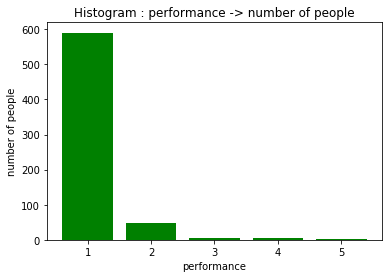

In [26]:
import matplotlib.pyplot as plt
plt.bar(dict_histogram.keys(), dict_histogram.values(), color='g')
plt.title('Histogram : performance -> number of people')
plt.xlabel('performance')
plt.ylabel('number of people')
plt.show()